# Experiment plotting

This notebook contains the code for plotting results for the different experiments.
When run for the first time for a town, condensed summary files are being created which strongly speed up subsequent generations of plots from the same summaries. It is possible to create the plots only from the condensed summaries located in 'summaries/condensed_summaries'.
Note that this works for all experiments but the Rt plots, which still require the full summary file.


In [56]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
import os
import pandas as pd
import pickle
import itertools
from lib.measures import *
from lib.experiment import Experiment, Plot, Result, get_properties, load_summary_list, load_summary
from lib.data import collect_data_from_df
from lib.calibrationSettings import calibration_lockdown_dates, calibration_start_dates, calibration_mob_paths
from lib.calibrationFunctions import get_calibrated_params, downsample_cases
import lib.plot as lib_plot
from lib.plot import Plotter
import matplotlib.pyplot as plt
from lib.summary import load_condensed_summary

In [89]:
commithash = '0fb75f9'

# Glance

In [ ]:
def show_summary_over_time():
    
    country = 'CH'
    area = 'GER'
    commithash = '287d1e9'
    
    
    colors = ['#31a354', '#08519c', '#bd0026', '#f03b20', '#fd8d3c', '#fecc5c', '#ffffb2']
    
    path = (f'conditional-measures-CH-BE-287d1e9/'
            f'conditional-measures-CH-BE'
            f'-max_incidence=50'
            f'-p_compliance=0.1'
            f'.pk')

    
    
    paths = [path]
    titles = ['test']
    labels = ['test']
    

    
    plot_filename = f'test'
    plotter = Plotter()

    plotter.compare_quantity(
        paths, 
        titles=titles,
        labels=labels,
        quantity='infected',
        mode='total',
        colors=colors,
        ymax=80000,
        filename=plot_filename, 
        figsize=lib_plot.FIG_SIZE_FULL_PAGE_DOUBLE_ARXIV_TALL, 
        figformat='neurips-double',
        legend_is_left=True)
    
show_summary_over_time()


# Model validation

## Transferability of parameters

CH BE
Loaded previously extracted data.
metadata.model_params:
.beta_household 0.003812184324488044
.beta_site      {'education': 0.033707067370414734, 'social': 0.033707067370414734, 'bus_stop': 0.033707067370414734, 'office': 0.033707067370414734, 'supermarket': 0.033707067370414734}

GER TU
Loaded previously extracted data.
metadata.model_params:
.beta_household 0.06646805256605148
.beta_site      {'education': 0.04027511551976204, 'social': 0.04027511551976204, 'bus_stop': 0.04027511551976204, 'office': 0.04027511551976204, 'supermarket': 0.04027511551976204}

CH JU
Loaded previously extracted data.
metadata.model_params:
.beta_household 0.007998227141797543
.beta_site      {'education': 0.013159019872546196, 'social': 0.013159019872546196, 'bus_stop': 0.013159019872546196, 'office': 0.013159019872546196, 'supermarket': 0.013159019872546196}

GER KL
Loaded previously extracted data.
metadata.model_params:
.beta_household 0.02499999850988388
.beta_site      {'education': 0.014999999

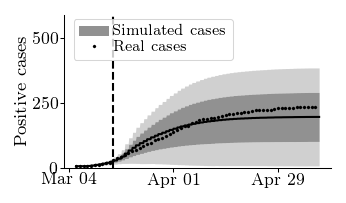

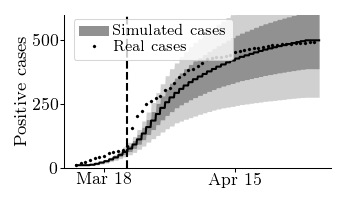

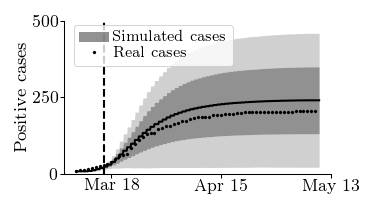

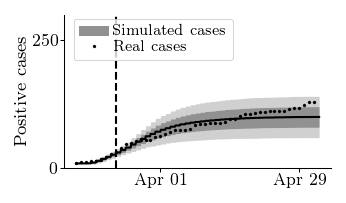

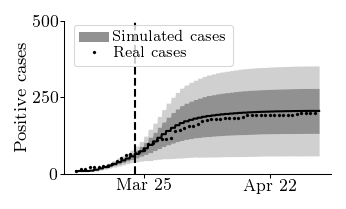

In [109]:
def plot_model_fit_and_transferability(calibration_area='BE', ymax=None, show_legend=True):

    validation_pairs = {
        'BE': [('CH', 'BE')],
        'JU': [('CH', 'JU')],
        'TU': [('GER', 'TU')],
        'KL': [('GER', 'KL')],
        'RH': [('GER', 'RH')],
    }
    
    ymax = {
        'GER': {'TU': 600, 'SB': 800, 'KL': 300, 'RH': 500, 'TR': 2000,},
        'CH': {'VD': 2000, 'BE': 590, 'TI': 500, 'JU': 500, 'BS': 3000, 'LU' : 500}
    }

    for country, area in validation_pairs[calibration_area]:
        
        print(country, area)
        
        labels = ['Simulated cases']
#         labels = [f'Simulation {area} ({calibration_area} params)']
        paths = [f'validation-{calibration_area}-{commithash}/validation-{calibration_area}-validation_region={area}.pk']
        plot_filename = f'Modelfit-{calibration_area}-{area}'
        
        plotter = Plotter()
        
        ts, predicted = plotter.plot_positives_vs_target(
            paths=paths, 
            labels=labels,
            country=country,
            area=area,
            ymax=ymax[country][area],
            lockdown_label_y=ymax[country][area]/8,
            filename=plot_filename,
#             figsize=lib_plot.FIG_SIZE_NEURIPS_TRIPLE,
            figsize=(2.3, 1.5),
            figformat='neurips-double',
            small_figure=True,
            show_legend=show_legend)

plot_model_fit_and_transferability(calibration_area='BE')
plot_model_fit_and_transferability(calibration_area='TU')
plot_model_fit_and_transferability(calibration_area='JU')
plot_model_fit_and_transferability(calibration_area='KL')
plot_model_fit_and_transferability(calibration_area='RH')

!bash crop_pdfs.sh plots/Modelfit-*.pdf

## Calibration parameter heatmaps

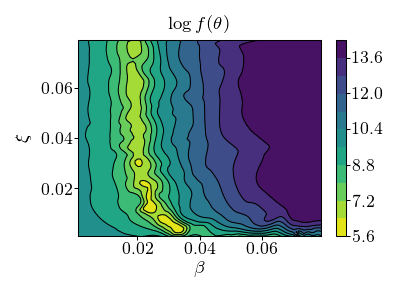

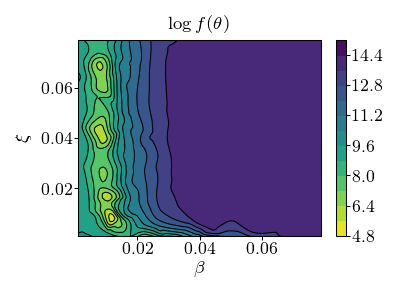

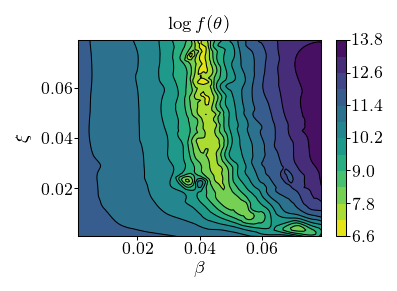

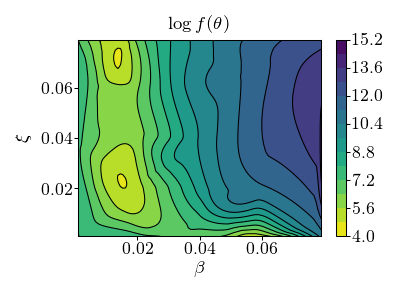

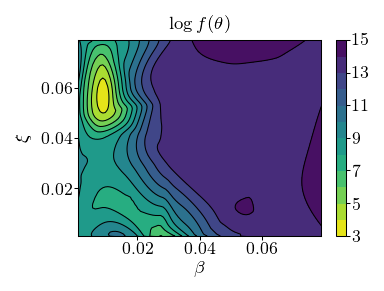

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `tmp.pdf'.
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `tmp.pdf'.
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `tmp.pdf'.
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `tmp.pdf'.
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `tmp.pdf'.


In [115]:
plotter = Plotter()
plotter.beta_parameter_heatmap(
    country='CH', 
    area='BE', 
    calibration_state='logs/acm-tsas/calibration_be0_state.pk',
    figsize=(2.7, 2.0),
#     cmap='gist_heat_r',
   cmap='viridis_r',    
    levels=12,
    ceil=1e6
)
plotter.beta_parameter_heatmap(
    country='CH', 
    area='JU', 
    calibration_state='logs/acm-tsas/calibration_ju0_state.pk',
    figsize=(2.7, 2.0),
#     cmap='gist_heat_r',
   cmap='viridis_r', 
    levels=12,
    ceil=1e6
)

plotter.beta_parameter_heatmap(
    country='GER', 
    area='TU', 
    calibration_state='logs/acm-tsas/calibration_tu0_state.pk',
    figsize=(2.7, 2.0),
#     cmap='gist_heat_r',
   cmap='viridis_r', 
    levels=12,
    ceil=1e6
)


plotter.beta_parameter_heatmap(
    country='GER', 
    area='KL', 
    calibration_state='logs/acm-tsas/calibration_kl0_state.pk',
    figsize=(2.7, 2.0),
#     cmap='gist_heat_r',
   cmap='viridis_r', 
    levels=12,
    ceil=1e6,
)

plotter.beta_parameter_heatmap(
    country='GER', 
    area='RH', 
    calibration_state='logs/acm-tsas/calibration_rh0_state.pk',
    figsize=(2.7, 2.0),
#     cmap='gist_heat_r',
   cmap='viridis_r', 
    levels=12,
    ceil=1e6,
)


!bash crop_pdfs.sh plots/bo-result-*.pdf


# Social distancing

Social distancing: (panel with 1 plot total infections, 1 plot peak hospitalizations) [lockdown, k=2-groups, vulnerable group, conditional measures thres=50]

In [ ]:
def plot_social_distancing_relative_reduction(*, country, area, mode, ps_adoption, plot_rt=True, plot_pmf=False, commithash=None):
        
    plot_filename = f'social-distancing-strategies-{country}-{area}'


    baseline_path= (f'baseline-{country}-{area}-{baseline_commithash}/'
                 f'baseline-{country}-{area}'
                 f'-expected_daily_base_expo_per100k=0.7142857142857143.pk')
    
    paths = {'Everyone': [f'lockdown-{country}-{area}-{commithash}/'
                      f'lockdown-{country}-{area}'
                      f'-p_compliance={p_adoption}'
                      '.pk' for p_adoption in ps_adoption],

             'Alternating groups': [f'k-groups-{country}-{area}-{commithash}/'
                                     f'k-groups-{country}-{area}'
                                     f'-K_groups=2'
                                     f'-p_compliance={p_adoption}'
                                     f'.pk' for p_adoption in ps_adoption],
             
             'Vulnerable groups': [f'vulnerable-groups-{country}-{area}-{commithash}/'
                                     f'vulnerable-groups-{country}-{area}'
                                     f'-p_compliance={p_adoption}'
                                     f'.pk' for p_adoption in ps_adoption],
             
             'Case incidence threshold': [f'conditional-measures-{country}-{area}-{commithash}/'
                                     f'conditional-measures-{country}-{area}'
                                     f'-max_incidence=50'
                                     f'-p_compliance={p_adoption}'
                                     f'.pk' for p_adoption in ps_adoption],
            }
                 

    titles = list(paths.keys())

    plotter = Plotter()
    plotter.compare_peak_reduction(path_list=list(paths.values()), 
                                   baseline_path=baseline_path, 
                                   ps_adoption=ps_adoption,
                                   titles=titles,
                                   mode=mode,
                                   log_xscale=False,
                                   filename=plot_filename,
                                   legend_is_left=True,
                                   figsize=lib_plot.FIG_SIZE_FULL_PAGE_DOUBLE_ARXIV_TALL, 
                                   figformat='neurips-double')

              
plot_social_distancing_relative_reduction(
    country='CH', 
    area='JU', 
    mode='cumu_infected',   # Allowed values ['cumu_infected', 'hosp', 'dead']
    ps_adoption=[1.0, 0.75, 0.5, 0.25, 0.1, 0.05],
    plot_rt=True, 
    plot_pmf=False,
    commithash=commithash
)

# Contact tracing

Contact tracing : (panel with 1 plot total infections, 1 plot peak hospitalizations) [contact tracing, delay=1, 24, 48h]

In [ ]:
def plot_tracing_relative_reduction(*, country, area, mode, ps_adoption, test_lags, plot_rt=True, plot_pmf=False, commithash=None):
        
    plot_filename = f'social-distancing-strategies-{country}-{area}'
    
    baseline_path= (f'baseline-{country}-{area}-{baseline_commithash}/'
                 f'baseline-{country}-{area}'
                 f'-expected_daily_base_expo_per100k=0.7142857142857143.pk')
    
    paths, titles = [], []
    for test_lag in test_lags:
        paths.append([f'tracing-{country}-{area}-{commithash}/'
                      f'tracing-{country}-{area}'
                      f'-p_adoption={p_adoption}'
                      f'-test_lag={test_lag}'
                      f'-tracing_threshold=0.016'
                      '.pk' for p_adoption in ps_adoption])
    
        titles.append(f'Tracing and testing, {test_lag}h test delay')
                 


    plotter = Plotter()
    plotter.compare_peak_reduction(path_list=paths, 
                                   baseline_path=baseline_path, 
                                   ps_adoption=ps_adoption,
                                   titles=titles,
                                   mode=mode,   # Allowed values ['cumu_infected', 'hosp', 'dead']
                                   filename=plot_filename,
                                   figsize=lib_plot.FIG_SIZE_FULL_PAGE_DOUBLE_ARXIV_TALL, 
                                   figformat='neurips-double')

              
plot_tracing_relative_reduction(
    country='CH', 
    area='JU', 
    mode='cumu_infected',   # Allowed values ['cumu_infected', 'hosp', 'dead']
    ps_adoption=[1.0, 0.75, 0.5, 0.25, 0.1],
    test_lags=[48.0],#, 24.0, 3.0, 1.0],
    plot_rt=True, 
    plot_pmf=False,
    commithash=tracing_commithash
)

# Rt

\subsection{Overdispersion}
(2x4 double-column panel) [lockdown, k=2-groups, conditional measures 50, contact tracing 48h]

In [ ]:
def plot_daily_rt_kt(country, area, experiment, p_adoption):
        
    if experiment == 'Baseline':
        path = (f'baseline-{country}-{area}-{baseline_commithash}/'
                  f'baseline-{country}-{area}-.pk')

    elif experiment == 'Lockdown':
        path = (f'lockdown-{country}-{area}-{commithash}/'
                      f'lockdown-{country}-{area}'
                      f'-p_compliance={p_adoption}'
                      '.pk')
    elif experiment == 'Alternating curfews':
        path = (f'k-groups-{country}-{area}-{commithash}/'
                             f'k-groups-{country}-{area}'
                             f'-K_groups=2'
                             f'-p_compliance={p_adoption}'
                             f'.pk')
    elif experiment == 'Vulnerable groups':
        path = (f'vulnerable-groups-{country}-{area}-{commithash}/'
                             f'vulnerable-groups-{country}-{area}'
                             f'-p_compliance={p_adoption}'
                             f'.pk')
    elif experiment == 'Conditional measures':
        path = (f'conditional-measures-{country}-{area}-{commithash}/'
                             f'conditional-measures-{country}-{area}'
                             f'-max_incidence=50'
                             f'-p_compliance={p_adoption}'
                             f'.pk')
    elif experiment == 'Tracing':
        path = (f'tracing-{country}-{area}-{tracing_commithash}/'
                      f'tracing-{country}-{area}'
                      f'-p_adoption={p_adoption}'
                      f'-test_lag=48.0'
                      f'-tracing_threshold=0.016'
                      '.pk')
        
    plot_filename = f'{experiment}-{country}-{area}'
    
    plotter = lib_plot.Plotter()
    
    plotter.plot_daily_nbinom_rts(
        path=path, 
        filename=plot_filename+'-daily-Rt',
        figsize=lib_plot.FIG_SIZE_FULL_PAGE_TRIPLE_ARXIV, 
        figformat='neurips-double',
        ymax=4.4,
        xlim=(0, 127),
        x_axis_dates=False,
        subplots_adjust={'bottom':0.2, 'top': 0.98, 'left': 0.12, 'right': 0.96},
    )        
        
    plotter = lib_plot.Plotter()
    plotter.plot_nbinom_distributions(
        path=path,
        ymax=0.85,
        figsize=lib_plot.FIG_SIZE_FULL_PAGE_TRIPLE_ARXIV,
        figformat='neurips-double',
        filename=plot_filename+'-pmf',
    )
        

experiments = ['Baseline', 'Lockdown', 'Alternating curfews', 'Vulnerable groups', 'Conditional measures', 'Tracing']
for experiment in experiments:
    plot_daily_rt_kt('CH', 'JU', experiment=experiment, p_adoption=0.5)


# Crop pdf margins
!bash crop_pdfs.sh plots/daily-nbinom-rts-*.pdf
!bash crop_pdfs.sh plots/prob-secondaryCases-*.pdf

# Exposures per visit

Loaded previously extracted data.
   1043 / 11300  11300 / 11300
Poisson/dispersion statistics:
       t0     t1      mean      var  max  chi2_pval  vt_pval
28  672.0  840.0  2.448484  8.89065   36        0.0      0.0

Chi-squared test: p = 0.00000000
Variance test:    p = 0.00000000

Save: plots/nbin-secondary-exposures-baseline-t0=28.pdf
Loaded previously extracted data.
  11300 / 11300
Poisson/dispersion statistics:
       t0     t1      mean       var  max  chi2_pval  vt_pval
28  672.0  840.0  0.362154  0.930421   26        0.0      0.0

Chi-squared test: p = 0.00000000
Variance test:    p = 0.00000000

Save: plots/nbin-visit-exposures-baseline-t0=28.pdf
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `tmp.pdf'.
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `tmp.pdf'.


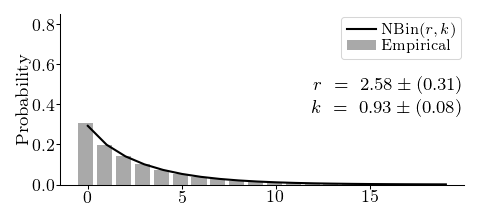

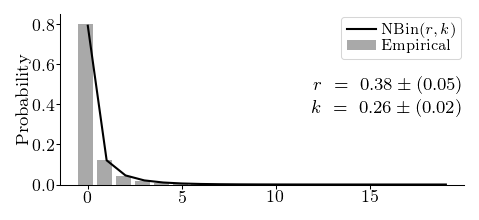

In [114]:
def plot_exposure_nbinoms(path, day_eval_points=[28]):

    for t0_days in day_eval_points:

        t0 = t0_days * 24.0
        label_range = []

        plotter = lib_plot.Plotter()
        plotter.plot_nbinom_distributions(
            path=path,
            filename=f'baseline-t0={t0_days}',
            t0=t0,
            label_range=label_range,
            ymax=0.85,
            figsize=lib_plot.FIG_SIZE_FULL_PAGE_DOUBLE_ARXIV,
            figformat='neurips-double',
        )
        plotter.plot_visit_nbinom_distributions(
            path=path,
            filename=f'baseline-t0={t0_days}',
            t0=t0,
            label_range=label_range,
            ymax=0.85,
            figsize=lib_plot.FIG_SIZE_FULL_PAGE_DOUBLE_ARXIV,
            figformat='neurips-double',
        )

path = (
    f'baseline-CH-BE-f5cfa6f/'
    f'baseline-CH-BE-expected_daily_base_expo_per100k=0.7142857142857143'
    '.pk'
)
day_eval_points = [28] 
plot_exposure_nbinoms(path, day_eval_points)

!bash crop_pdfs.sh plots/nbin-secondary-*.pdf
!bash crop_pdfs.sh plots/nbin-visit-*.pdf


# Not in paper: Different quantities over time

In [ ]:
# def plot_single_summary(path):
#     paths = [path]
    
#     title = f'Social distancing for all, 5\%'
#     title = f'Baseline'
        
#     # plots
#     plotter = Plotter()

#     plotter.compare_quantity(
#         paths, 
#         titles=[title],
#         labels=[title],
#         quantity='infected',    # Allowed values: ['infected', 'hosp', 'dead']
#         mode='total', 
#         ymax=None,
#         filename=title, 
#         figsize=lib_plot.FIG_SIZE_FULL_PAGE_DOUBLE_ARXIV_TALL, 
#         figformat='neurips-double',
#         legend_is_left=True)

In [ ]:
# # baseline = f'baseline-CH-JU-3cde09b/baseline-CH-JU-expected_daily_base_expo_per100k=5.0.pk'
# cond = 'conditional-measures-CH-BE-287d1e9/conditional-measures-CH-BE-max_incidence=50-p_compliance=0.1_condensed.pk'

# plot_single_summary(cond)